In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [7]:
titanic_df = pd.read_csv('/Users/maxwell/Downloads/Python/Dataset-Titanic/train.csv')

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
#Interesting questions?
#Descriptive stats about the passengers? Sex, Age, etc...
#Ticket, fare and cabin details?
#Where are the passengers from and where are they going?
#What features increased or decreased a passengers chance of surviving?

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

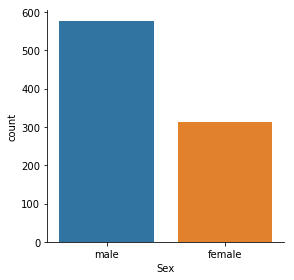

In [21]:
sns.factorplot('Sex', kind = 'count', data = titanic_df)

In [22]:
#There are a lot more male then female passengers.

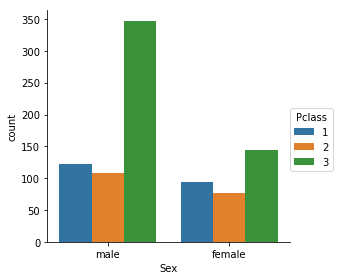

In [23]:
sns.factorplot('Sex', kind = 'count', data = titanic_df, hue = 'Pclass')

In [24]:
#But the majority of male passengers were in the 3rd/lowest class.

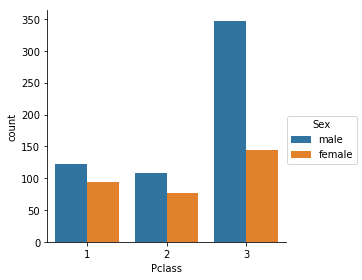

In [25]:
sns.factorplot('Pclass', kind = 'count', data = titanic_df, hue = 'Sex')

In [26]:
#Another perspective, class separated by sex.
#Create a new column, Person, to identify if they are a child or not.

In [27]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [28]:
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [32]:
titanic_df['Person'].unique()

array(['male', 'female', 'child'], dtype=object)

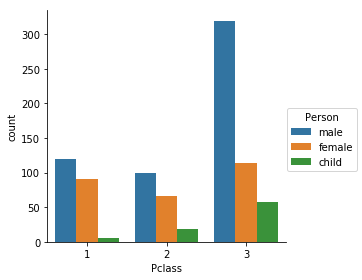

In [33]:
sns.factorplot('Pclass', data = titanic_df, kind = 'count', hue = 'Person')

In [34]:
#Interesting trend. The number of children increases as the passenger class becomes lower.

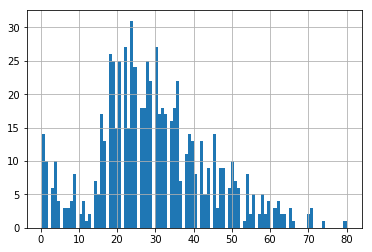

In [36]:
titanic_df['Age'].hist(bins = 100)

In [37]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

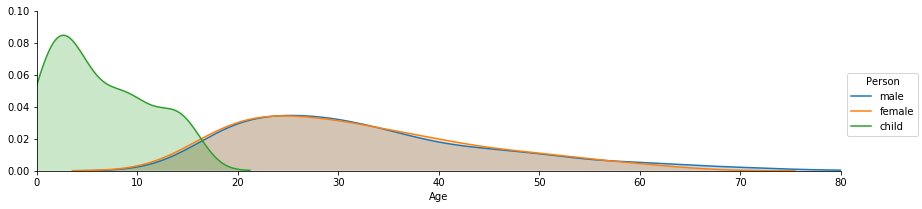

In [47]:
fig = sns.FacetGrid(titanic_df, hue = 'Person', aspect = 4)
#Create figure to setup facet grid.

fig.map(sns.kdeplot, 'Age', shade = True)
#KDE plot based on age.

oldest = titanic_df['Age'].max()
#Find oldest person to have cutoff for plot.

fig.set(xlim = (0, oldest))
fig.set(ylim = (0, .1))

fig.add_legend()

In [ ]:
#Age distribution based on child or adult male/female. Adult male/female has more of a normal distribution.

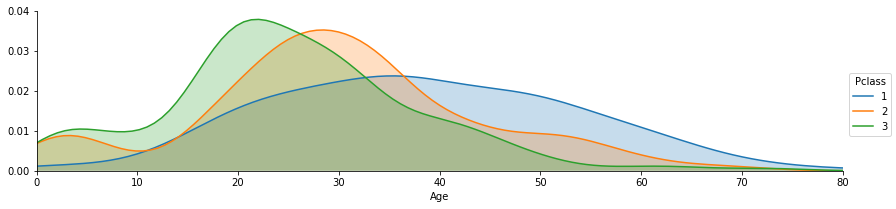

In [44]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
#Create figure to setup facet grid.

fig.map(sns.kdeplot, 'Age', shade = True)
#KDE plot based on age.

oldest = titanic_df['Age'].max()
#Find oldest person to have cutoff for plot.

fig.set(xlim = (0, oldest))
fig.set(ylim = (0, .04))

fig.add_legend()

In [48]:
#Age distribution based on passenger class.

In [50]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

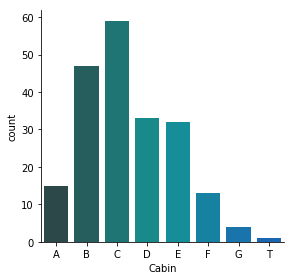

In [63]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'winter_d', order = 
              ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [54]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

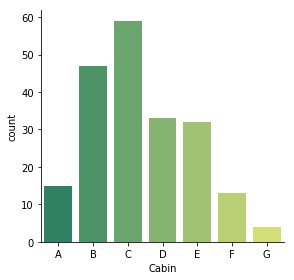

In [62]:
sns.factorplot('Cabin', data = cabin_df, kind = 'count', palette = 'summer', order = 
              ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

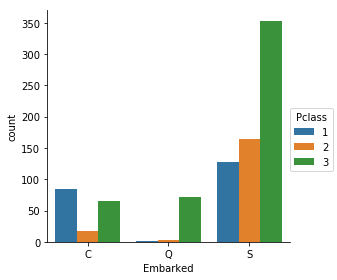

In [65]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass', order = 
              ['C', 'Q', 'S'])

In [66]:
#View the class of passenger that boarded based on where they boarded. 
#S, Q had disproportionate number of 3rd class.

In [67]:
#Find more info about if the passenger was traveling alone or in a party.
#SibSp defines the number of siblings or spouses that passenger had with them aboard.
#Parch defines the number of parents or children that passenger had with them aboard.

In [72]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
#If the passenger was alone then the value will be 0. Else > 0.

In [73]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [74]:
titanic_df.Alone.unique()

array(['With Family', 'Alone'], dtype=object)

In [75]:
#Now we know if that passenger was traveling alone or with family.

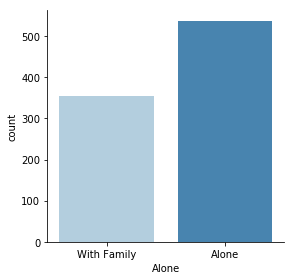

In [76]:
sns.factorplot('Alone', kind = 'count', data = titanic_df, palette = 'Blues')

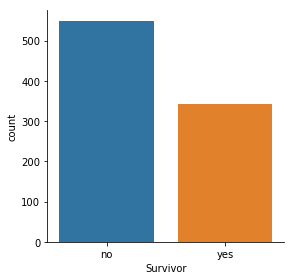

In [78]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})
sns.factorplot('Survivor', kind = 'count', data = titanic_df)

In [79]:
#Did class impact survivability?

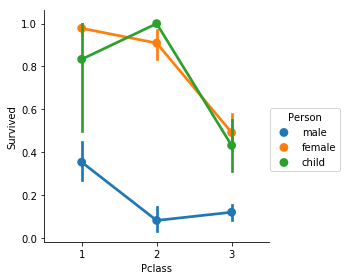

In [82]:
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic_df,)

In [83]:
#Males had low survival rates, so did all 3rd class passengers.

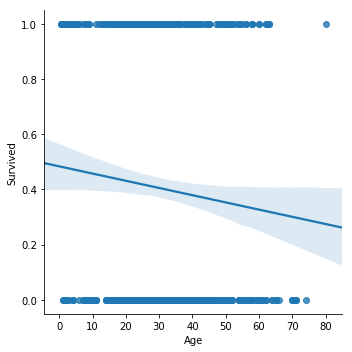

In [84]:
sns.lmplot('Age', 'Survived', data = titanic_df)

In [85]:
#Looks like the older the passenger, the less likely they survived.

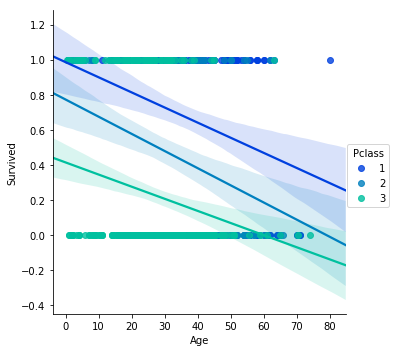

In [86]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter')

In [87]:
#Same type of trend exists across class as well.

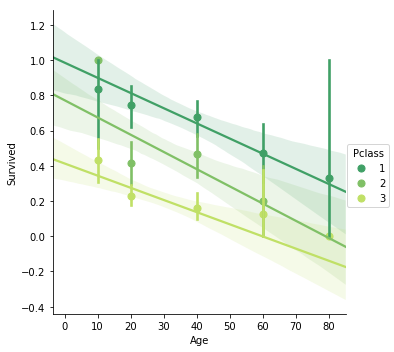

In [89]:
generations = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'summer', x_bins = generations)

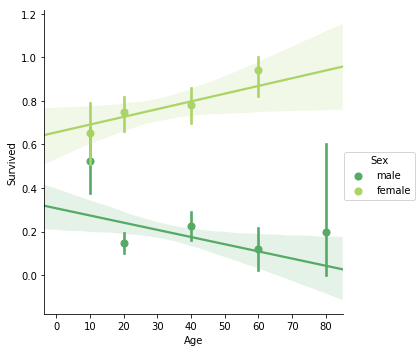

In [90]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'summer', x_bins = generations)

In [91]:
#As age increased for females survivability increased while the opposite happened for males.

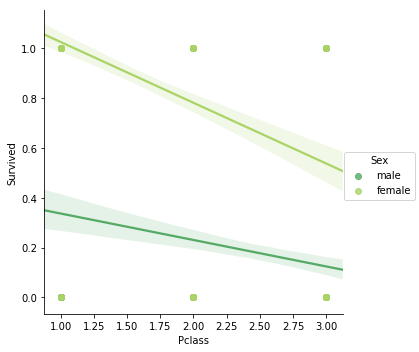

In [93]:
sns.lmplot('Pclass', 'Survived', hue = 'Sex', data = titanic_df, palette = 'summer')

In [105]:
def solo(alone):
    status = alone
    if status == 'With Family':
        return 0
    else:
        return 1

In [106]:
titanic_df['Solo'] = titanic_df['Alone'].apply(solo)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,1


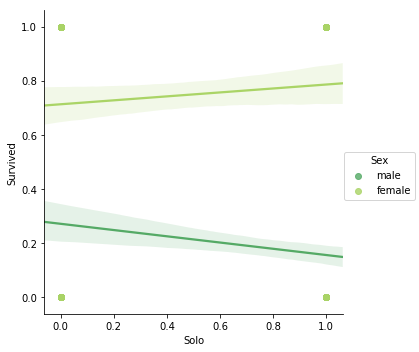

In [107]:
sns.lmplot('Solo', 'Survived', hue = 'Sex', data = titanic_df, palette = 'summer')

In [ ]:
#Solo males had lower survivability while solo females had higher survivability